In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import json
import re
import pprint
import json
from collections import defaultdict

In [438]:
with open("columns_dict.json", "r") as json_file:
    columns_dict = json.load(json_file)

In [439]:
with open("feature_dict.json", "r") as json_file:
    feature_dict = json.load(json_file)

In [440]:
df = pd.read_csv(
    'train.csv',
    na_values=[],
    keep_default_na=False  # Prevent "None" and other default markers from being treated as NaN
)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [441]:
df = df.set_index('Id')

In [442]:
df.dtypes.value_counts()

object    46
int64     34
Name: count, dtype: int64

We could see that this dataset have 33 numerical , 31 categorical, and 15 ordinal features. # verify

In [443]:
df.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   443.639726    46.549315   567.240411  1057.429452  ...   
std       20.645407   456.098091   161.319273   441.866955   438.705324  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%     1994.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     2004.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max     2010.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

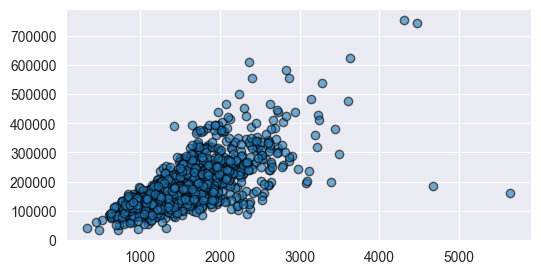

In [444]:
plt.figure(figsize=(6, 3))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.6, edgecolor='k')

In [445]:
df = df[df.GrLivArea < 4000] # eliminate above 4000 sq. feet

In [446]:
df[["BsmtFinType1", "BsmtFinType2"]]

BsmtFinType1 BsmtFinType2
Id                            
1             GLQ          Unf
2             ALQ          Unf
3             GLQ          Unf
4             ALQ          Unf
5             GLQ          Unf
...           ...          ...
1456          Unf          Unf
1457          ALQ          Rec
1458          GLQ          Unf
1459          GLQ          Rec
1460          BLQ          LwQ

[1456 rows x 2 columns]

In [447]:
cols_to_drop = ["BsmtFinType2"]
df = df.drop(columns=cols_to_drop)

Let's handle NA and None values in the dataset

In [450]:
na_to_no_item_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
none_to_no_item_cols = ["MasVnrType"]

In [451]:
# checking if there any None in the na_to_no_item_cols columns
s = 0 
for col in na_to_no_item_cols:
    print(df[col].value_counts())
    flag = "None" in df[col].value_counts().keys()
    print(flag)
    s += int(flag)
print(s) 

Alley
NA      1365
Grvl      50
Pave      41
Name: count, dtype: int64
False
BsmtQual
TA    649
Gd    618
Ex    117
NA     37
Fa     35
Name: count, dtype: int64
False
BsmtCond
TA    1307
Gd      65
Fa      45
NA      37
Po       2
Name: count, dtype: int64
False
BsmtExposure
No    953
Av    220
Gd    131
Mn    114
NA     38
Name: count, dtype: int64
False
BsmtFinType1
Unf    430
GLQ    414
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: count, dtype: int64
False
FireplaceQu
NA    690
Gd    378
TA    312
Fa     33
Ex     23
Po     20
Name: count, dtype: int64
False
GarageType
Attchd     867
Detchd     387
BuiltIn     87
NA          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
False
GarageFinish
Unf    605
RFn    422
Fin    348
NA      81
Name: count, dtype: int64
False
GarageQual
TA    1307
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
False
GarageCond
TA    1322
NA      81
Fa      35
Gd       9
Po       7
Ex 

In [452]:
df[none_to_no_item_cols].value_counts()

MasVnrType
None          863
BrkFace       444
Stone         126
BrkCmn         15
NA              8
Name: count, dtype: int64

In [453]:
df[na_to_no_item_cols] = df[na_to_no_item_cols].replace("NA", "No_item")
df[none_to_no_item_cols] = df[none_to_no_item_cols].replace("None", "No_item")

In [454]:
# counting NA
d_na = {}
for col in df.columns:
    # print(col)
    if "NA" in df[col].value_counts():
        temp = df[col].value_counts().reset_index()
        if temp.keys:
            # print(temp.loc[temp[col] == "NA"]["count"].item())
            d_na[col] = temp.loc[temp[col] == "NA"]["count"].item()
d_na

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1,
 'GarageYrBlt': 81}

In [455]:
for col in d_na.keys(): # iterating over cols with NAs
    df[col] = df[col].replace("NA", np.nan)

In [456]:
df[d_na.keys()].dtypes

LotFrontage    object
MasVnrType     object
MasVnrArea     object
Electrical     object
GarageYrBlt    object
dtype: object

In [457]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'])
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'])
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'])

In [458]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 79, dtype: object

In [459]:
df.to_csv('train_prepared_for_cv.csv')

In [460]:
df_nulls = df.isna().sum()[df.isna().sum() > 0]

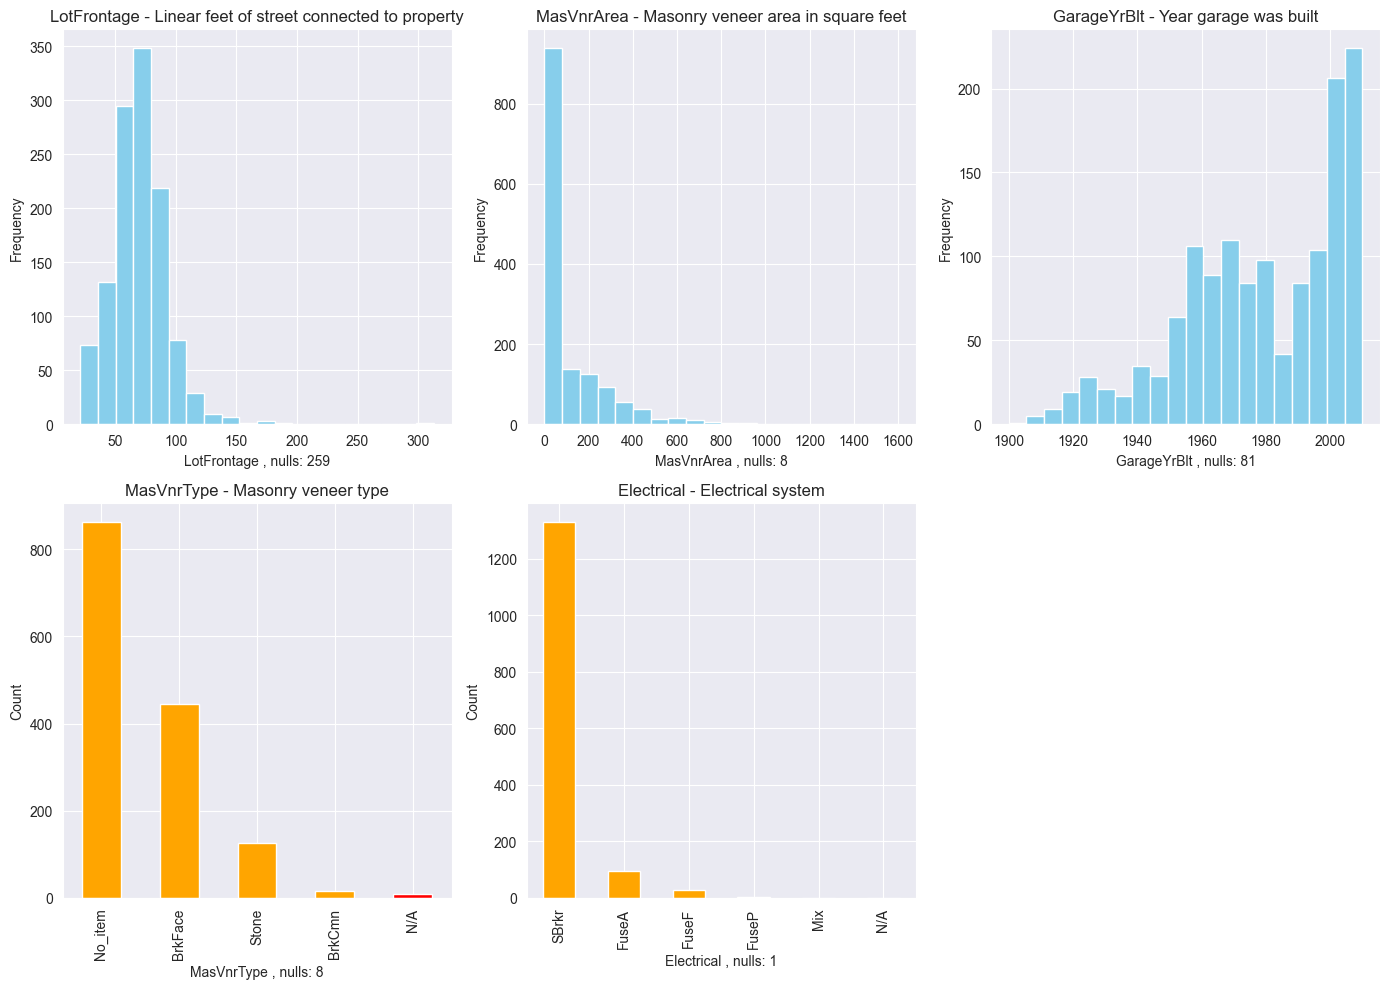

In [461]:
columns_with_nans = df.columns[df.isna().any()]
numeric_cols_with_nans = [col for col in columns_with_nans if df[col].dtype in ['int64', 'float64']]
categorical_cols_with_nans = [col for col in columns_with_nans if col not in numeric_cols_with_nans]

all_columns = numeric_cols_with_nans + categorical_cols_with_nans
num_cols = len(all_columns)

rows = ceil(num_cols / 3)
fig, axes = plt.subplots(rows, 3, figsize=(14, rows * 3 + 4))
axes = axes.flatten()

for i, col in enumerate(all_columns):
    ax = axes[i]
    title = col + " - " + columns_dict.get(col, "")
    x_label = col + " , nulls: " + str(df_nulls[col])
    if col in numeric_cols_with_nans:
        df[col].plot(kind='hist', bins=20, ax=ax, title=title, color='skyblue')
        ax.set_xlabel(x_label)
    elif col in categorical_cols_with_nans:
        value_counts = df[col].fillna("N/A").value_counts()
        colors = ["orange" if index != "N/A" else "red" for index in value_counts.index]
        value_counts.plot(kind='bar', ax=ax, title=title, color=colors)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [462]:
# df_to_train_models_on_cv = df.copy() # copying data fo further use to compare the models so we sould not impute values on the whole dataset

In [463]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [464]:
print(f"filling with {df['MasVnrType'].mode()[0]}")
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

filling with No_item


In [465]:
print(f"filling with {df['MasVnrArea'].median()}")
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

filling with 0.0


In [466]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-1) # supposed to work better than 0 for linear models 

In [467]:
df['Electrical'] = df['Electrical'].fillna(df['MasVnrArea'].median())

In [468]:
df.isna().any().sum() # no columns have nans

np.int64(0)

In [469]:
# counting NA
d_na_and_none = {}
for col in df.columns:
    if "NA" in df[col].value_counts() or "None" in df[col].value_counts():
        temp = df[col].value_counts().reset_index()
        if temp.keys:
            # print(temp.loc[temp[col] == "NA"]["count"].item())
            d_na_and_none[col] = temp.loc[temp[col] == "NA"]["count"].item()
d_na_and_none

{}

In [470]:
# no "NA" or "None"

In [471]:
df.to_csv('train_preprocessed.csv')

Let's look at the dist of numerical features

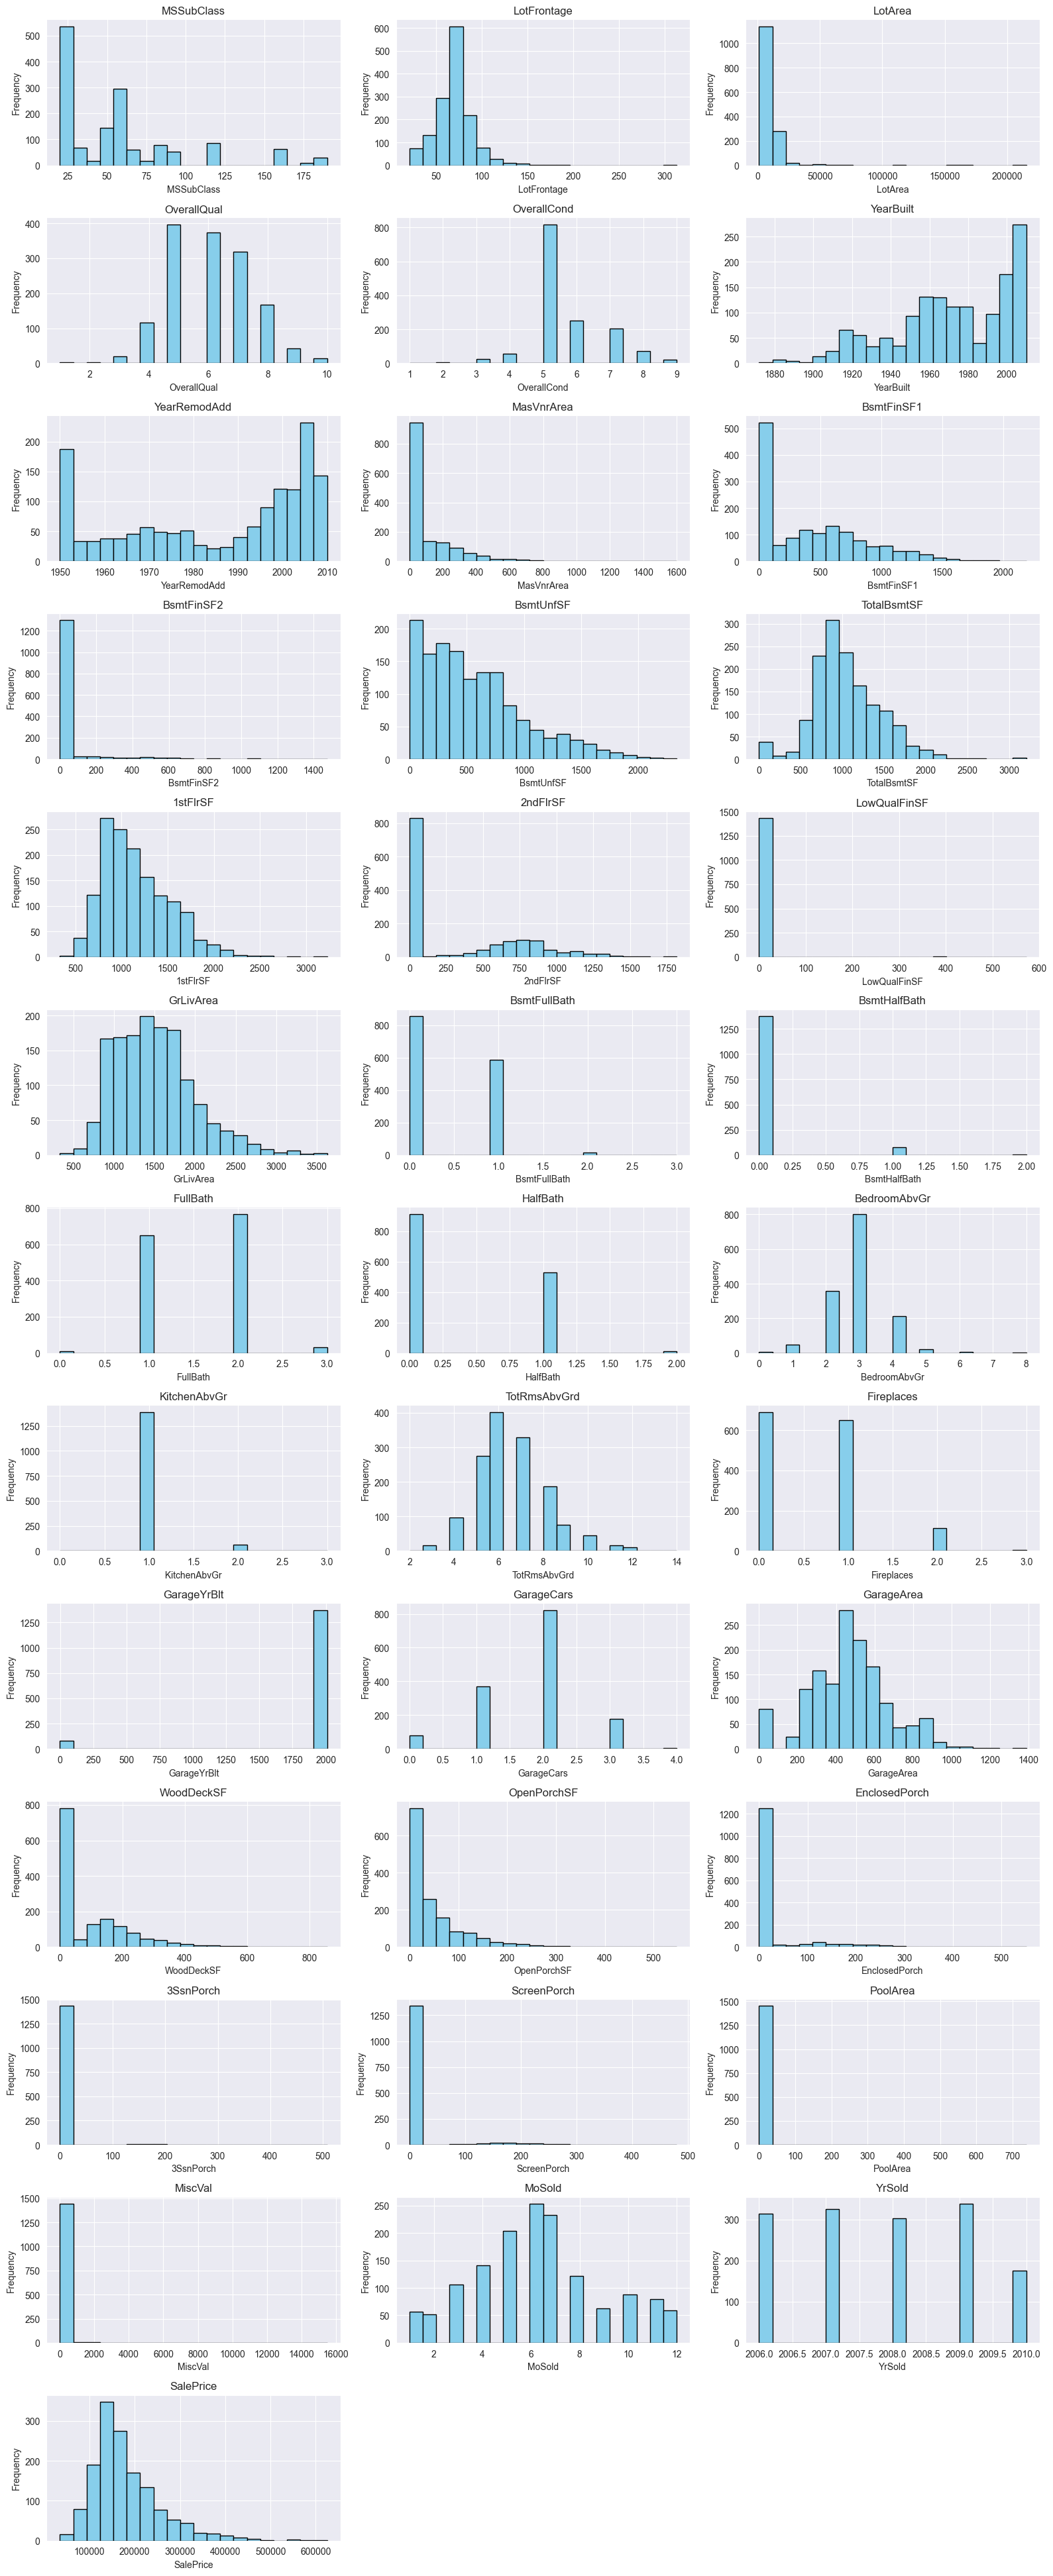

In [472]:
num_plots = len(numeric_cols)
cols = 3
rows = ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].plot(kind='hist', bins=20, ax=axes[i], title=col, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Lets plot boxplots for numerical features

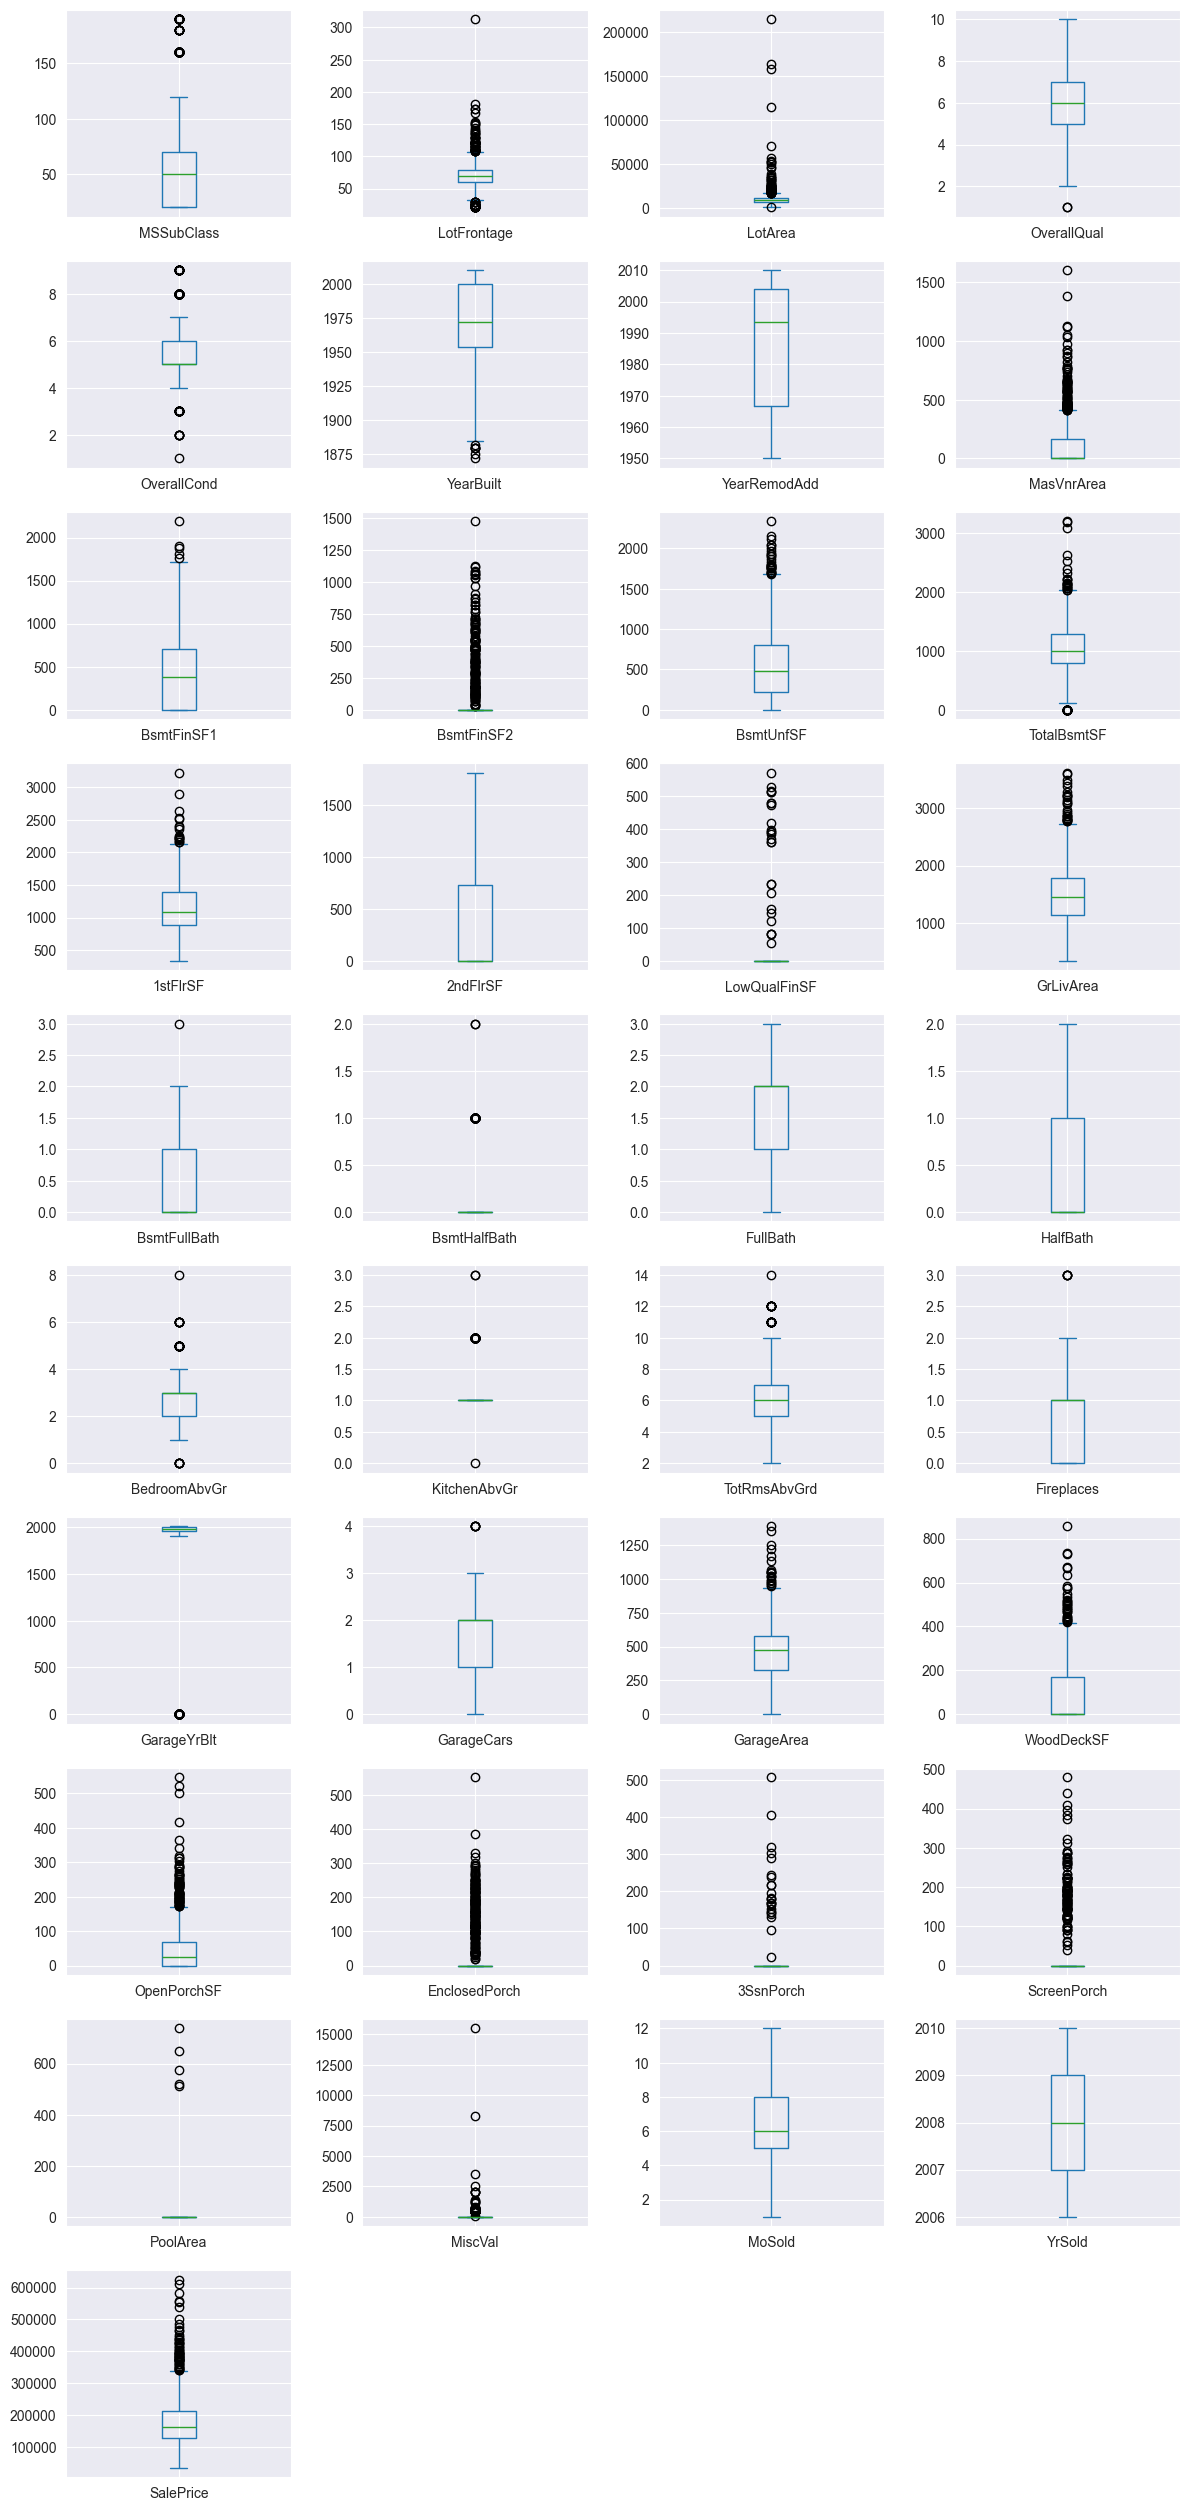

In [473]:
df[numeric_cols].plot(subplots=True, layout=(12,4), kind='box', figsize=(12, 30))
plt.tight_layout()
plt.show()

Let's find correlations with numerical features

In [474]:
correlation_matrix = df[numeric_cols].corr()

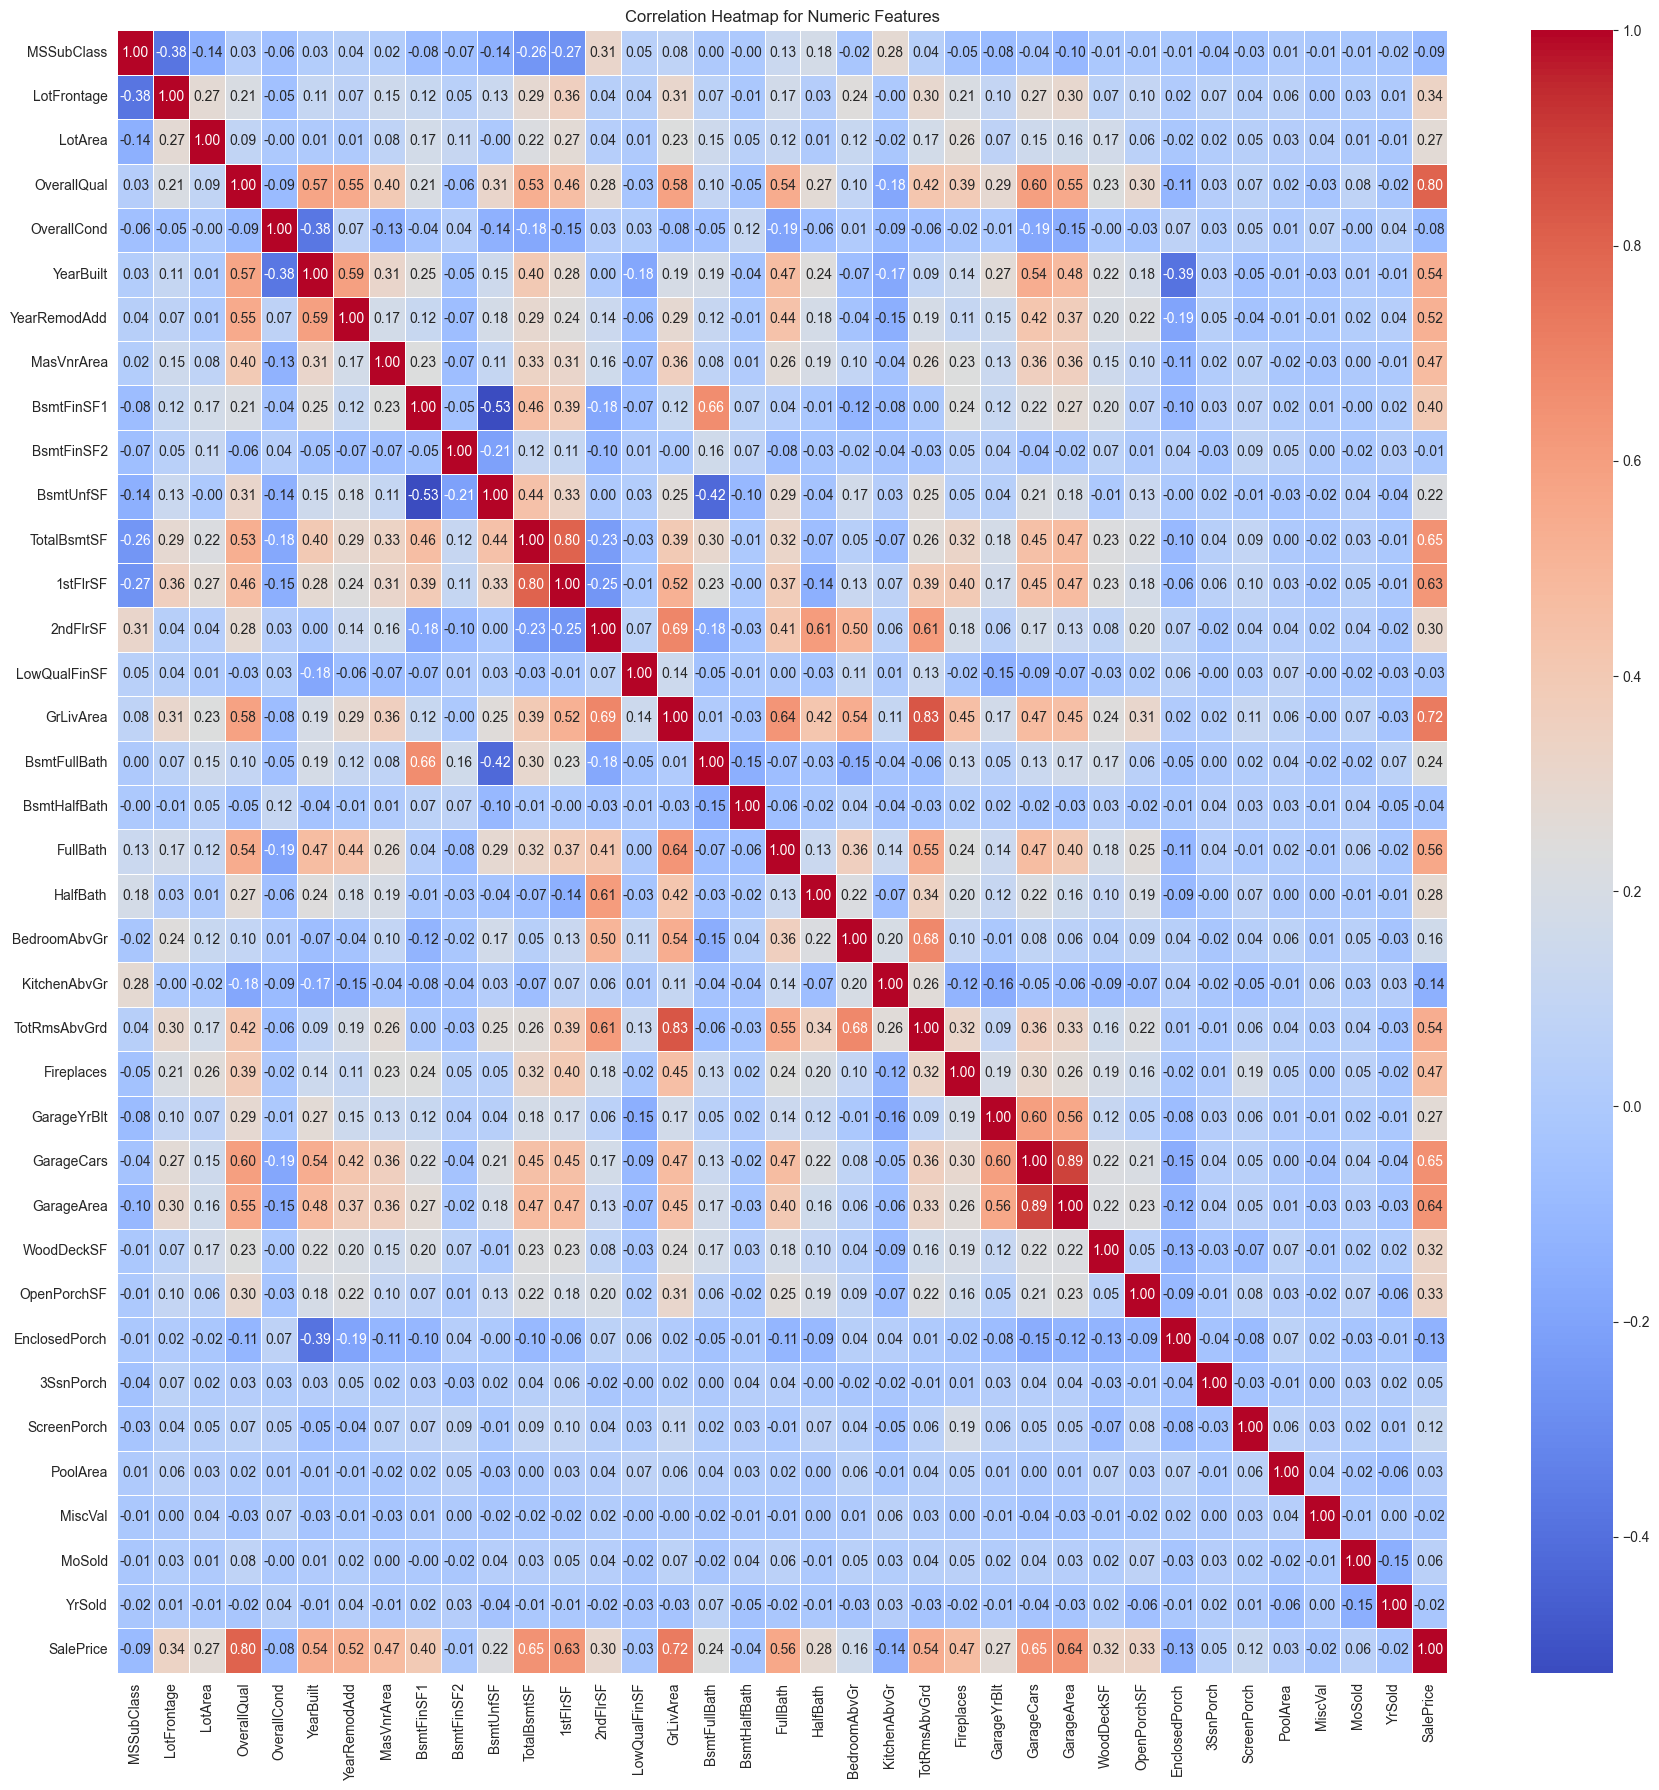

In [475]:
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Features")
plt.tight_layout()
plt.show()

In [476]:
threshold = 0.6

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

highly_correlated_pairs = upper_triangle.stack().reset_index()
highly_correlated_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
highly_correlated_pairs = highly_correlated_pairs[
    abs(highly_correlated_pairs['Correlation']) > threshold
]

In [477]:
highly_correlated_pairs.sort_values(by='Correlation', ascending=False) # high correlations above threshold

Feature 1     Feature 2  Correlation
600    GarageCars    GarageArea     0.886882
441     GrLivArea  TotRmsAbvGrd     0.833979
137   OverallQual     SalePrice     0.800858
341   TotalBsmtSF      1stFlrSF     0.800759
455     GrLivArea     SalePrice     0.720516
391      2ndFlrSF     GrLivArea     0.687430
531  BedroomAbvGr  TotRmsAbvGrd     0.679346
267    BsmtFinSF1  BsmtFullBath     0.661933
610    GarageCars     SalePrice     0.649256
365   TotalBsmtSF     SalePrice     0.646584
620    GarageArea     SalePrice     0.636964
437     GrLivArea      FullBath     0.635161
389      1stFlrSF     SalePrice     0.625235
398      2ndFlrSF  TotRmsAbvGrd     0.610794
395      2ndFlrSF      HalfBath     0.609022

In [478]:
highly_correlated_pairs.loc[highly_correlated_pairs['Feature 2'] == 'SalePrice', :] # correlation with target 

Feature 1  Feature 2  Correlation
137  OverallQual  SalePrice     0.800858
365  TotalBsmtSF  SalePrice     0.646584
389     1stFlrSF  SalePrice     0.625235
455    GrLivArea  SalePrice     0.720516
610   GarageCars  SalePrice     0.649256
620   GarageArea  SalePrice     0.636964

Let's find correlations for cat and binary features now

In [479]:
[col for col in df.columns if df[col].nunique() <= 2] # cols with 2 values or less

['Street', 'Utilities', 'CentralAir']

Group mean analysis for categorical features

In [480]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if col not in numeric_cols]

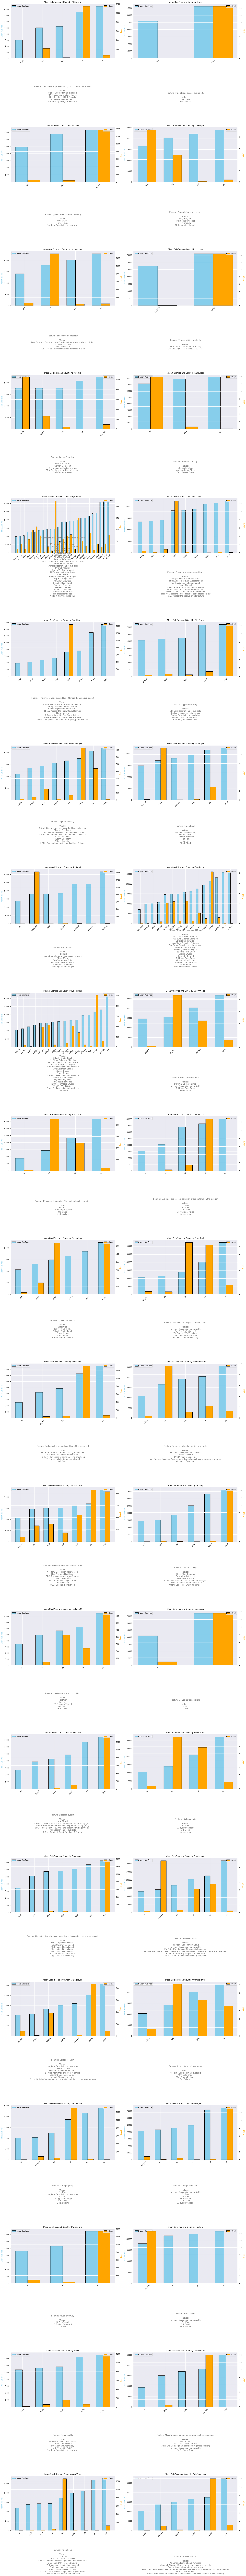

In [481]:
mean_comparison_results = {}
target_column = 'SalePrice'

num_plots = len(categorical_cols)
cols = 2
rows = ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    category_means = df.groupby(col)[target_column].mean()
    category_counts = df[col].value_counts()
    sorted_categories = category_means.sort_values().index
    sorted_means = category_means[sorted_categories]
    sorted_counts = category_counts[sorted_categories]
    mean_comparison_results[col] = sorted_means
    x = np.arange(len(sorted_categories))

    ax1 = axes[i]
    ax2 = ax1.twinx()

    bar_width = 0.35

    ax1.bar(x - bar_width / 2, sorted_means, width=bar_width, color='skyblue', edgecolor='black', label='Mean SalePrice')
    ax2.bar(x + bar_width / 2, sorted_counts, width=bar_width, color='orange', edgecolor='black', label='Count')

    ax1.set_title(f"Mean {target_column} and Count by {col}")
    ax1.set_xticks(x)
    ax1.set_xticklabels(sorted_categories, rotation=45)
    ax1.set_ylabel("Mean SalePrice", color='skyblue')
    ax2.set_ylabel("Count", color='orange')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    feature_description = feature_dict.get(col, {}).get("desc", "Description not available")
    value_descriptions = feature_dict.get(col, {}).get("values", {})
    sorted_value_desc_text = "\n".join(
        [f"{key}: {value_descriptions.get(key, 'Description not available')}" for key in sorted_categories]
    )

    full_description = f"Feature: {feature_description}\n\nValues:\n{sorted_value_desc_text}"

    ax1.text(
        0.5, -0.8, full_description, transform=ax1.transAxes, ha="center", fontsize=12, color="gray", wrap=True
    )

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [482]:
ordinal_columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "Street", "Alley", "PavedDrive"]

In [487]:
encoding_mappings = {}

for col in ordinal_columns:
    if col in df.columns and col in feature_dict:
        all_values = list(feature_dict[col]["values"].keys())  # Extract and preserve the order of values from the dict
        mapping = {category: rank for rank, category in enumerate(reversed(all_values), start=1)}  # Encode in the dict order
        mapping["No_item"] = -1
        if "NA" in mapping.keys():
            del mapping["NA"]
        encoding_mappings[col] = mapping

In [488]:
encoding_mappings

{'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No_item': -1},
 'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No_item': -1},
 'BsmtQual': {'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6, 'No_item': -1},
 'BsmtCond': {'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6, 'No_item': -1},
 'BsmtExposure': {'No': 2, 'Mn': 3, 'Av': 4, 'Gd': 5, 'No_item': -1},
 'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No_item': -1},
 'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No_item': -1},
 'FireplaceQu': {'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6, 'No_item': -1},
 'GarageQual': {'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6, 'No_item': -1},
 'GarageCond': {'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6, 'No_item': -1},
 'PoolQC': {'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No_item': -1},
 'Street': {'Grvl': 1, 'Pave': 2, 'No_item': -1},
 'Alley': {'Grvl': 2, 'Pave': 3, 'No_item': -1},
 'PavedDrive': {'N': 1, 'P': 2, 'Y': 3, 'No_item': -1}}

In [489]:
def safe_map(value, mapping):
    if value not in mapping:
        raise ValueError(f"Value '{value}' not found in the mapping!")
    return mapping[value]

for col in ordinal_columns:
    df[col] = df[col].apply(lambda x: safe_map(x, encoding_mappings[col]))

In [418]:
df.dtypes[df.dtypes == object] # how many columns are still categorical

MSZoning         object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
CentralAir       object
Electrical       object
Functional       object
GarageType       object
GarageFinish     object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [421]:
new_categorical_cols = list(df.dtypes[df.dtypes == object].index)
new_categorical_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']